https://universe.roboflow.com/pedro-azevedo-3c9ol/bdd100k-3zgda/dataset/5

In [ ]:
!pip install tensorflow importlib pandas matplotlib seaborn IPython wget tf_slim lvis tensorflow-io

https://www.kaggle.com/datasets/jessicali9530/stanford-cars-dataset?select=cars_annos.mat training data used

In [ ]:
!pip install scipy

In [ ]:
#cropping images to test
from PIL import Image

def crop_test_image(image_name: str, xmin: int, ymin: int, xmax: int, ymax: int):
    # Load the image
    image_path = ".\\training_data\\standford\\cars_test\\cars_test\\" + image_name
    image = Image.open(image_path)
    
    # Define the bounding box
    bbox = (xmin, ymin, xmax, ymax)
    
    # Crop the image using the bounding box
    cropped_image = image.crop(bbox)
    
    # Save the cropped image
    cropped_image.save(".\\invalid_cropped_images\\" + image_name)

In [ ]:
#load data and convert to json
import scipy.io
import json
import pandas as pd
import numpy as np
import os

def get_bounding_boxes_from_matlab_file(file_path: str) :
    mat = scipy.io.loadmat(file_path)
    
    annotations = mat['annotations']
    
    annotations = np.transpose(annotations)
    
    bboxes = []
    
    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        
        #crop_test_image(fname, bbox_x1, bbox_y1, bbox_x2, bbox_y2)
        bboxes.append((fname, bbox_x1, bbox_x2, bbox_y1, bbox_y2))
    
    test_meta = pd.DataFrame(bboxes, columns = ['fnames','bbox_x1', 'bbox_x2', 'bbox_y1', 'bbox_y2'])
    
    print(test_meta)
    return bboxes

def get_bounding_boxes_from_matlab_file_train(file_path: str) :
    mat = scipy.io.loadmat(file_path)
    
    annotations = mat['annotations']
    
    annotations = np.transpose(annotations)
    print(annotations)
    # print(annotations[0][0][1][0][0])
    
    bboxes = []
    
    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        
        #crop_test_image(fname, bbox_x1, bbox_y1, bbox_x2, bbox_y2)
        bboxes.append((fname, bbox_x1, bbox_x2, bbox_y1, bbox_y2))
    
    test_meta = pd.DataFrame(bboxes, columns = ['fnames','bbox_x1', 'bbox_x2', 'bbox_y1', 'bbox_y2'])
    
    print(test_meta)
    return bboxes
    

def save_to_coco_json(data_vec, image_dir: str, json_file: str):
    categories = [
        {'id': 1, 'name': 'Car'}
    ]
    # Initialize the data dictionary
    data = {'images': [], 'annotations': [], 'categories': categories}
    
    counter = 1
    for elem in data_vec:
        image_id = elem[0].split('.')[0]

        annotation = {
                'id': counter,
                'image_id': int(image_id),
                'category_id': 1,
                'bbox': [int(elem[1]), int(elem[2]), int(elem[3]), int(elem[4])],
                'area': int((elem[4] - elem[1]) * (elem[3] - elem[2])),
                "iscrowd": 0
            }
        data['annotations'].append(annotation)
        counter += 1
    
    # Add the images to the data dictionary
    for annotation in data['annotations']:
        if annotation['image_id'] not in [image['id'] for image in data['images']]:
            
            image = Image.open(image_dir + "\\" + "{0:05d}".format(annotation['image_id']) + '.jpg')
            width, height = image.size
            data['images'].append({
                'id': annotation['image_id'],
                'file_name': "{0:05d}".format(annotation['image_id']) + '.jpg',
                'height': int(height), 
                'width': int(width) 
            })
    
    # Save the data dictionary as JSON
    with open(json_file, 'w') as f:
        json.dump(data, f)

test_file = os.path.abspath(".\\training_data\\standford\\cars_test_annos.mat")
test_img_dir = os.path.abspath(".\\training_data\\standford\\cars_test\\cars_test")
# train_file = os.path.abspath(".\\training_data\\standford\\cars_train_annos.mat")
# train_img_dir = os.path.abspath(".\\training_data\\standford\\cars_train\\cars_train")

test_data = get_bounding_boxes_from_matlab_file(test_file)
# train_data = get_bounding_boxes_from_matlab_file_train(train_file)

# coco_json_train = os.path.abspath(".\\training_data\\standford\\coco_train_standford.json")
coco_json_test = os.path.abspath(".\\training_data\\standford\\coco_test_standford.json")

save_to_coco_json(test_data, test_img_dir, coco_json_test)
# save_to_coco_json(train_data, train_img_dir, coco_json_train)

https://github.com/udacity/self-driving-car/tree/master/annotations#download training data used(outdated)

In [ ]:
import os
import csv


train_directory_path = 'C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\training_data\\train'
evaluate_directory_path = 'C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\training_data\\evaluate'
test_directory_path = 'C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\training_data\\test'

label_file_path = 'C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\training_data\\labels\\labels.csv'

train_label_file_path = 'C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\training_data\\labels\\train_labels.csv'
evaluate_label_file_path = 'C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\training_data\\labels\\evaluate_labels.csv'
test_label_file_path = 'C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\training_data\\labels\\test_labels.csv'

train_filenames = set(os.listdir(train_directory_path))
evaluate_filenames = set(os.listdir(evaluate_directory_path))
test_filenames = set(os.listdir(test_directory_path))

with open(label_file_path, 'r') as csv_file, \
    open(train_label_file_path, 'w', newline='') as train_output_file, \
    open(evaluate_label_file_path, 'w', newline='') as evaluate_output_file, \
    open(test_label_file_path, 'w', newline='') as test_output_file:
    
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)
    
    train_csv_writer = csv.writer(train_output_file)
    train_csv_writer.writerow(header)
    evaluate_csv_writer = csv.writer(evaluate_output_file)
    evaluate_csv_writer.writerow(header)
    test_csv_writer = csv.writer(test_output_file)
    test_csv_writer.writerow(header)
    
    for row in csv_reader:
        if any(filename in row[4] for filename in train_filenames):
            train_csv_writer.writerow(row)
            
        if any (filename in row[4] for filename in evaluate_filenames):
            evaluate_csv_writer.writerow(row)
        
        if any (filename in row[4] for filename in test_filenames):
            test_csv_writer.writerow(row)
        

In [ ]:
#nevoie de python 3.9
def write_label_map(label_map, output_path):
    with open(output_path, 'w') as f:
        for id, name in label_map.items():
            f.write('item {\n')
            f.write('  id: {}\n'.format(id))
            f.write("  name: '{}'\n".format(name))
            f.write('}\n')

In [ ]:
label_map = {
    1: 'Car',
    2: 'Truck'
}

write_label_map(label_map, '.\\training_data\\labels\\coco_labels.pbtxt')

In [ ]:
#cropping images to test
from PIL import Image

def crop_image(image_name: str, xmin: int, ymin: int, xmax: int, ymax: int):
    # Load the image
    image_path = ".\\training_data\\object-detection-crowdai\\" + image_name
    image = Image.open(image_path)
    
    # Define the bounding box
    bbox = (xmin, ymin, xmax, ymax)
    
    # Crop the image using the bounding box
    cropped_image = image.crop(bbox)
    
    # Save the cropped image
    cropped_image.save(".\\invalid_cropped_images\\" + image_name)

In [ ]:
#CSV TO COCO JSON
import csv
import json
from PIL import Image

threshold = 160 * 160;

def generate_coco_file_from_csv(csv_file: str, json_file: str):
    ignore_labels = ["Pedestrian"]
    # Define the categories
    categories = [
        {'id': 1, 'name': 'Car'},
        {'id': 2, 'name': 'Truck'}
    ]
    
    # Initialize the data dictionary
    data = {'images': [], 'annotations': [], 'categories': categories}
    
    # Read the CSV file and add annotations to the data dictionary
    with open(csv_file, 'r') as f:
        reader = csv.DictReader(f)
        counter = 1  # Initialize the counter variable
        for row in reader:
            if row["Label"] in ignore_labels:
                continue
            
            image_id = int(row['Frame'].split('.')[0])
            category_id = 0
            for category in categories:
                if row['Label'] == category['name']:
                    category_id = category['id']
                    break
    
            annotation = {
                'id': counter,
                'image_id': image_id,
                'category_id': category_id,
                'bbox': [int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])],
                'area': ((int(row['xmax']) - int(row['xmin'])) * (int(row['ymax']) - int(row['ymin']))),
                "iscrowd": 0
            }
            
            #if annotation['area'] > threshold:
                # try:
                #     crop_image(row['Frame'], int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax']))
                # except:
                #     pass
                
            data['annotations'].append(annotation)
            counter +=1

    # Add the images to the data dictionary
    for annotation in data['annotations']:
        if annotation['image_id'] not in [image['id'] for image in data['images']]:
            
            image = Image.open('.\\training_data\\object-detection-crowdai\\' + str(annotation['image_id']) + '.jpg')
            width, height = image.size
            
            data['images'].append({
                'id': annotation['image_id'],
                'file_name': str(annotation['image_id']) + '.jpg',
                'height': int(width), 
                'width': int(height) 
            })

    # Save the data dictionary as JSON
    with open(json_file, 'w') as f:
        json.dump(data, f)
        
train_csv_file = '.\\training_data\\labels\\train_labels.csv'
train_json_file = '.\\training_data\\labels\\train_coco.json'
eval_csv_file = '.\\training_data\\labels\\evaluate_labels.csv'
eval_json_file = '.\\training_data\\labels\\evaluate_coco.json'
test_csv_file = '.\\training_data\\labels\\test_labels.csv'
test_json_file = '.\\training_data\\labels\\test_coco.json'

generate_coco_file_from_csv(train_csv_file, train_json_file)
generate_coco_file_from_csv(eval_csv_file, eval_json_file)
generate_coco_file_from_csv(test_csv_file, test_json_file)

Setup repo

In [ ]:
!protoc .\object_detection\protos\*.proto --python_out=.
!cp object_detection\packages\tf2\setup.py .
!python -m pip install .

In [ ]:
import os
import subprocess
import pyperclip

original_dir = os.getcwd()  # get the original directory

try:    
    os.chdir(".\\tf_repo\\models\\research\\object_detection\\dataset_tools")
except OSError as e:
    print(f"Error: {e.strerror}")
    

def delete_all_file_inside_folder(folder_path: str):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Error deleting file: {file_path}. {e}")
        
train_image_dir = '..\\..\\..\\..\\..\\training_data\\train'
val_image_dir = '..\\..\\..\\..\\..\\training_data\\evaluate'
test_image_dir = '..\\..\\..\\..\\..\\training_data\\test'
train_annotations_file = '..\\..\\..\\..\\..\\training_data\\labels\\train_coco.json'
val_annotations_file = '..\\..\\..\\..\\..\\training_data\\labels\\evaluate_coco.json'
testdev_annotations_file = '..\\..\\..\\..\\..\\training_data\\labels\\test_coco.json'
output_dir = '..\\..\\..\\..\\..\\models\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\setup_files'
label_map_path = '..\\..\\..\\..\\..\\training_data\\labels\\coco_labels.pbtxt'

cmd = [
    'python', 'create_coco_tf_record.py', '--logtostderr', 
    f'--train_image_dir={train_image_dir}', 
    f'--val_image_dir={val_image_dir}',
    f'--test_image_dir={test_image_dir}',
    f'--train_annotations_file={train_annotations_file}',
    f'--val_annotations_file={val_annotations_file}',
    f'--testdev_annotations_file={testdev_annotations_file}',
    f'--output_dir={output_dir}',
    f'--label_map_path={label_map_path}'
]
#run before cd .\\tf_repo\\models\\research\\object_detection\\dataset_tools
cmd = f"python create_coco_tf_record.py --logtostderr --train_image_dir=\"{train_image_dir}\" --val_image_dir=\"{val_image_dir}\" --test_image_dir=\"{test_image_dir}\" --train_annotations_file=\"{train_annotations_file}\" --val_annotations_file=\"{val_annotations_file}\" --testdev_annotations_file=\"{testdev_annotations_file}\" --output_dir=\"{output_dir}\" --label_map_path=\"{label_map_path}\""

pyperclip.copy(cmd)
print('Command copied to clipboard.')

#cleanup
delete_all_file_inside_folder(output_dir)
# subprocess.call(".\\tenserflow_env\\Scripts\\activate.bat && " + cmd, shell=True)
# result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
os.chdir(original_dir)
# if result.returncode == 0:
#     print(result.stdout)
# else:
#     print(result.stderr)


In [ ]:
# #to check types inside coco file
# import tensorflow as tf
# import os

# original_dir = os.getcwd()  # get the original directory

# try:    
#     os.chdir(".\\models\\faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8\\setup_files")
# except OSError as e:
#     print(f"Error: {e.strerror}")
    
# nr_files = 50; #to change

# # Define the file pattern and the output file name
# file_pattern = "coco_testdev.record-000{}-of-000{}"
# output_file = "merged.tfrecord"

# # Create a list of file names that match the pattern
# file_names = [file_pattern.format(str(i).zfill(2), nr_files) for i in range(nr_files)]

# filenames = tf.data.Dataset.list_files(file_names)

# # Create a TFRecordDataset from your file(s)
# dataset = tf.data.TFRecordDataset(file_names)

# dataset = filenames.interleave(
#     lambda filename: tf.data.TFRecordDataset(filename),
#     cycle_length=4,
#     num_parallel_calls=tf.data.AUTOTUNE
# )

# print(len(file_names))
# print(tf.data.experimental.cardinality(dataset).numpy())


    
# features = {
#     'image/encoded': tf.io.FixedLenFeature([], tf.string),
#     'image/object/image_id': tf.io.VarLenFeature(tf.int64),
#     'image/object/class/label': tf.io.VarLenFeature(tf.int64),
#     'image/filename': tf.io.FixedLenFeature([], tf.string),
#     'image/height': tf.io.FixedLenFeature([], tf.int64),
#     'image/width': tf.io.FixedLenFeature([], tf.int64),
#     'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
#     'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
#     'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
#     'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
#     'image/object/area': tf.io.VarLenFeature(tf.float32)
# }

# # Define a function to parse a single example, labels are inside coco file
# def parse_function(serialized_example):
#     example = tf.io.parse_single_example(serialized_example, features)
#     example['image/source_id'] = example['image/object/image_id']
#     del example['image/object/image_id']
#     return example


# def parse_tfrecord(example_proto):
#     parsed_example = tf.io.parse_single_example(example_proto, features)
#     parsed_example['image/source_id'] = parsed_example['image/object/image_id']
#     del parsed_example['image/object/image_id']
    
#     image = tf.io.decode_jpeg(parsed_example['image/encoded'], channels=3)
#     label = {
#         'bbox': tf.stack([parsed_example['image/object/bbox/ymin'].values,
#                         parsed_example['image/object/bbox/xmin'].values,
#                         parsed_example['image/object/bbox/ymax'].values,
#                         parsed_example['image/object/bbox/xmax'].values], axis=-1),
#         'classes': parsed_example['image/object/class/label'].values
#     }
#     return image, label


# def check_if_dataset_is_ok(dataset):
#     parsed_dataset = dataset.map(parse_tfrecord)
    
#     # load and display the first image and label
#     for image, label in parsed_dataset:
#         # display the image
#         import matplotlib.pyplot as plt
#         plt.imshow(image.numpy())
#         plt.show()
        
#         # display the label
#         print(label)

# #uncomment to verify validity
# #check_if_dataset_is_ok(dataset)

# os.chdir(original_dir)


In [ ]:
# #merge coco record files

# import tensorflow as tf

# original_dir = os.getcwd()  # get the original directory

# try:    
#     os.chdir(".\\models\\faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8\\setup_files")
# except OSError as e:
#     print(f"Error: {e.strerror}")
    
# with tf.io.TFRecordWriter(output_file) as writer:
#         parsed_dataset = dataset.map(parse_function)
        
#         cnt = 1
#         for elem in parsed_dataset:
#             example = tf.train.Example()
#             for key in elem.keys():
#                 if elem[key].dtype == tf.string:
#                     example.features.feature[key].bytes_list.value.extend([elem[key].numpy()])
#                 elif elem[key].dtype in [tf.float32, tf.float64]:
#                     example.features.feature[key].float_list.value.extend(tf.sparse.to_dense(elem[key]).numpy())
#                 elif elem[key].dtype == tf.int16:
#                     if (hasattr(elem[key].numpy(), '__iter__')):
#                         for value in elem[key].numpy():
#                             example.features.feature[key].int64_list.value.append(value)
#                     else:
#                         example.features.feature[key].int64_list.value.append(elem[key].numpy())
        
#             serialized = example.SerializeToString()
#             writer.write(serialized)
#             print(f'{cnt} item')
#             cnt+=1
            
# os.chdir(original_dir)


In [ ]:
#to check that the files were merged the right
import tensorflow as tf

original_dir = os.getcwd()  # get the original directory

try:    
    os.chdir(".\\models\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\setup_files")
except OSError as e:
    print(f"Error: {e.strerror}")
    
merged_file = 'merged.tfrecord'
#merged_file = 'coco_testdev.record-00001-of-00050'
# Create a TFRecordDataset from the merged file

for record in tf.data.TFRecordDataset(merged_file):
    example = tf.train.Example()
    example.ParseFromString(record.numpy())

    print(example.features.feature.keys())
    
os.chdir(original_dir)

To check if CUDA and cuDNN installed the right way

In [ ]:
import tensorflow as tf

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # set to the index of the NVIDIA GPU you want to use

print(tf.config.list_physical_devices('GPU'))

In [ ]:
import os
cuda_dir = os.environ['CUDA_DIR']
print(cuda_dir)

Setup Pipeline

In [ ]:
import json
import os

original_dir = os.getcwd()  # get the original directory

absolute_label_map_path = os.path.abspath(".\\training_data\\labels\\coco_labels.pbtxt")


print(f'Label map path: {absolute_label_map_path}')
absolute_tfrecord_path = os.path.abspath(".\\models\\faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8\\setup_files\\coco_testdev.record-000??-of-00050")
print(f'Tfrecord path: {absolute_tfrecord_path}')

try:
    os.chdir("C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\tf_repo\\models\\research")
except OSError as e:
    print(f"Error: {e.strerror}")
from object_detection.utils import config_util 


# https://github.com/udacity/self-driving-car/tree/master/annotations#download training data used
MODEL_DIR = os.path.abspath("..\\..\\..\\models\\faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8")
PIPELINE_PATH = os.path.abspath("..\\..\\..\\models\\faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8\\pipeline.config")

config = config_util.get_configs_from_pipeline_file(PIPELINE_PATH)


def find_key_path(key, json_obj, path=""):
    """
    Recursively search for a key in a JSON object and return its path.
    """
    if isinstance(json_obj, dict):
        for k, v in json_obj.items():
            if k == key:
                return f"{path}/{k}"
            else:
                result = find_key_path(key, v, f"{path}/{k}")
                if result:
                    return result
    elif isinstance(json_obj, list):
        for i, v in enumerate(json_obj):
            result = find_key_path(key, v, f"{path}/{i}")
            if result:
                return result



#need to change them manually sadly
# config['train_input_reader']['tf_record_input_reader']['input_path'] = absolute_tfrecord_path

# config['eval_input_reader']['label_map_path'] = absolute_label_map_path
# config['eval_input_reader']['tf_record_input_reader']['input_path'] = absolute_tfrecord_path
# config['train_config']['fine_tune_checkpoint'] = ".\\models\\faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8\\checkpoint\\checkpoint"

#saving json 
with open('C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\config_file.config', 'w') as f:
    print(config, file=f)
    
print(config)

os.chdir(original_dir)


Train the model

In [3]:
#copy object_detection/packages/tf2/setup.py and run python -m pip install . to setup the repo
#change dir to cd "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8"
import os
import pyperclip
print(os.getcwd())
script = os.path.abspath(".\\tf_repo\\models\\research\\object_detection\\model_main_tf2.py")
MODEL_DIR = os.path.abspath(".\\models\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\exports_2023-04-21_09-40-31")
PIPELINE_PATH = os.path.abspath(".\\models\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\pipeline.config")
nr_steps = 3000 # can be changed
command = "python \"{}\"  --model_dir=\"{}\" --pipeline_config_path=\"{}\"  --num_train_steps={}".format(script, MODEL_DIR, PIPELINE_PATH, nr_steps)

print(command)
pyperclip.copy(command)
#run this inside your own cmd
#!{command}

c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python
python "c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\tf_repo\models\research\object_detection\model_main_tf2.py"  --model_dir="c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\exports_2023-04-21_09-40-31" --pipeline_config_path="c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config"  --num_train_steps=3000


Evaluate the Model

In [4]:
command = "python \"{}\"  --model_dir=\"{}\" --pipeline_config_path=\"{}\"  --checkpoint_dir=\"{}\"".format(script, MODEL_DIR, PIPELINE_PATH, MODEL_DIR)

print(command)
pyperclip.copy(command)

python "c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\tf_repo\models\research\object_detection\model_main_tf2.py"  --model_dir="c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\exports_2023-04-21_09-40-31" --pipeline_config_path="c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config"  --checkpoint_dir="c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\exports_2023-04-21_09-40-31"


In [5]:
#to monitor progress
import pyperclip
command = "tensorboard --logdir='{}'".format(MODEL_DIR)

print(command)
pyperclip.copy(command)

tensorboard --logdir='c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\exports_2023-04-21_09-40-31'


Freeze the graph

In [26]:
import os
import datetime

base_folder = MODEL_DIR + "\\exports"
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

OUTPUT_DIR = f"{base_folder}_{timestamp}"

if not os.path.exists(OUTPUT_DIR):
    os.mkdir(OUTPUT_DIR)
    print(f"Created folder: {OUTPUT_DIR}")
else:
    print(f"Folder already exists: {OUTPUT_DIR}")

script = os.path.abspath(".\\tf_repo\\models\\research\\object_detection\\exporter_main_v2.py")

command = "python \"{}\"  --input_type=image_tensor --pipeline_config_path=\"{}\"  --trained_checkpoint_dir=\"{}\" --output_directory=\"{}\"".format(script, PIPELINE_PATH, MODEL_DIR, OUTPUT_DIR)

print(command)
pyperclip.copy(command)

#!{command}

Created folder: c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\exports_2023-04-27_23-20-18
python "c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\tf_repo\models\research\object_detection\exporter_main_v2.py"  --input_type=image_tensor --pipeline_config_path="c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config"  --trained_checkpoint_dir="c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8" --output_directory="c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\exports_2023-04-27_23-20-18" --exporter_type=tf1


In [2]:
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

IMAGE_SIZE = (12, 8) # Output display size as you want
import matplotlib.pyplot as plt

OUTPUT_DIR = ".\\models\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\exports_2023-04-21_09-40-31"
PATH_TO_SAVED_MODEL= OUTPUT_DIR + "\\saved_model"
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\MLDataTraining\\Python\\Tensorflow\\training_data\\BDD100K\\train\\cars-pedestrians_label_map.pbtxt",use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

Loading model...Done!


[0.39488953 0.23947006 0.8881771  0.67966056]
0.83625805


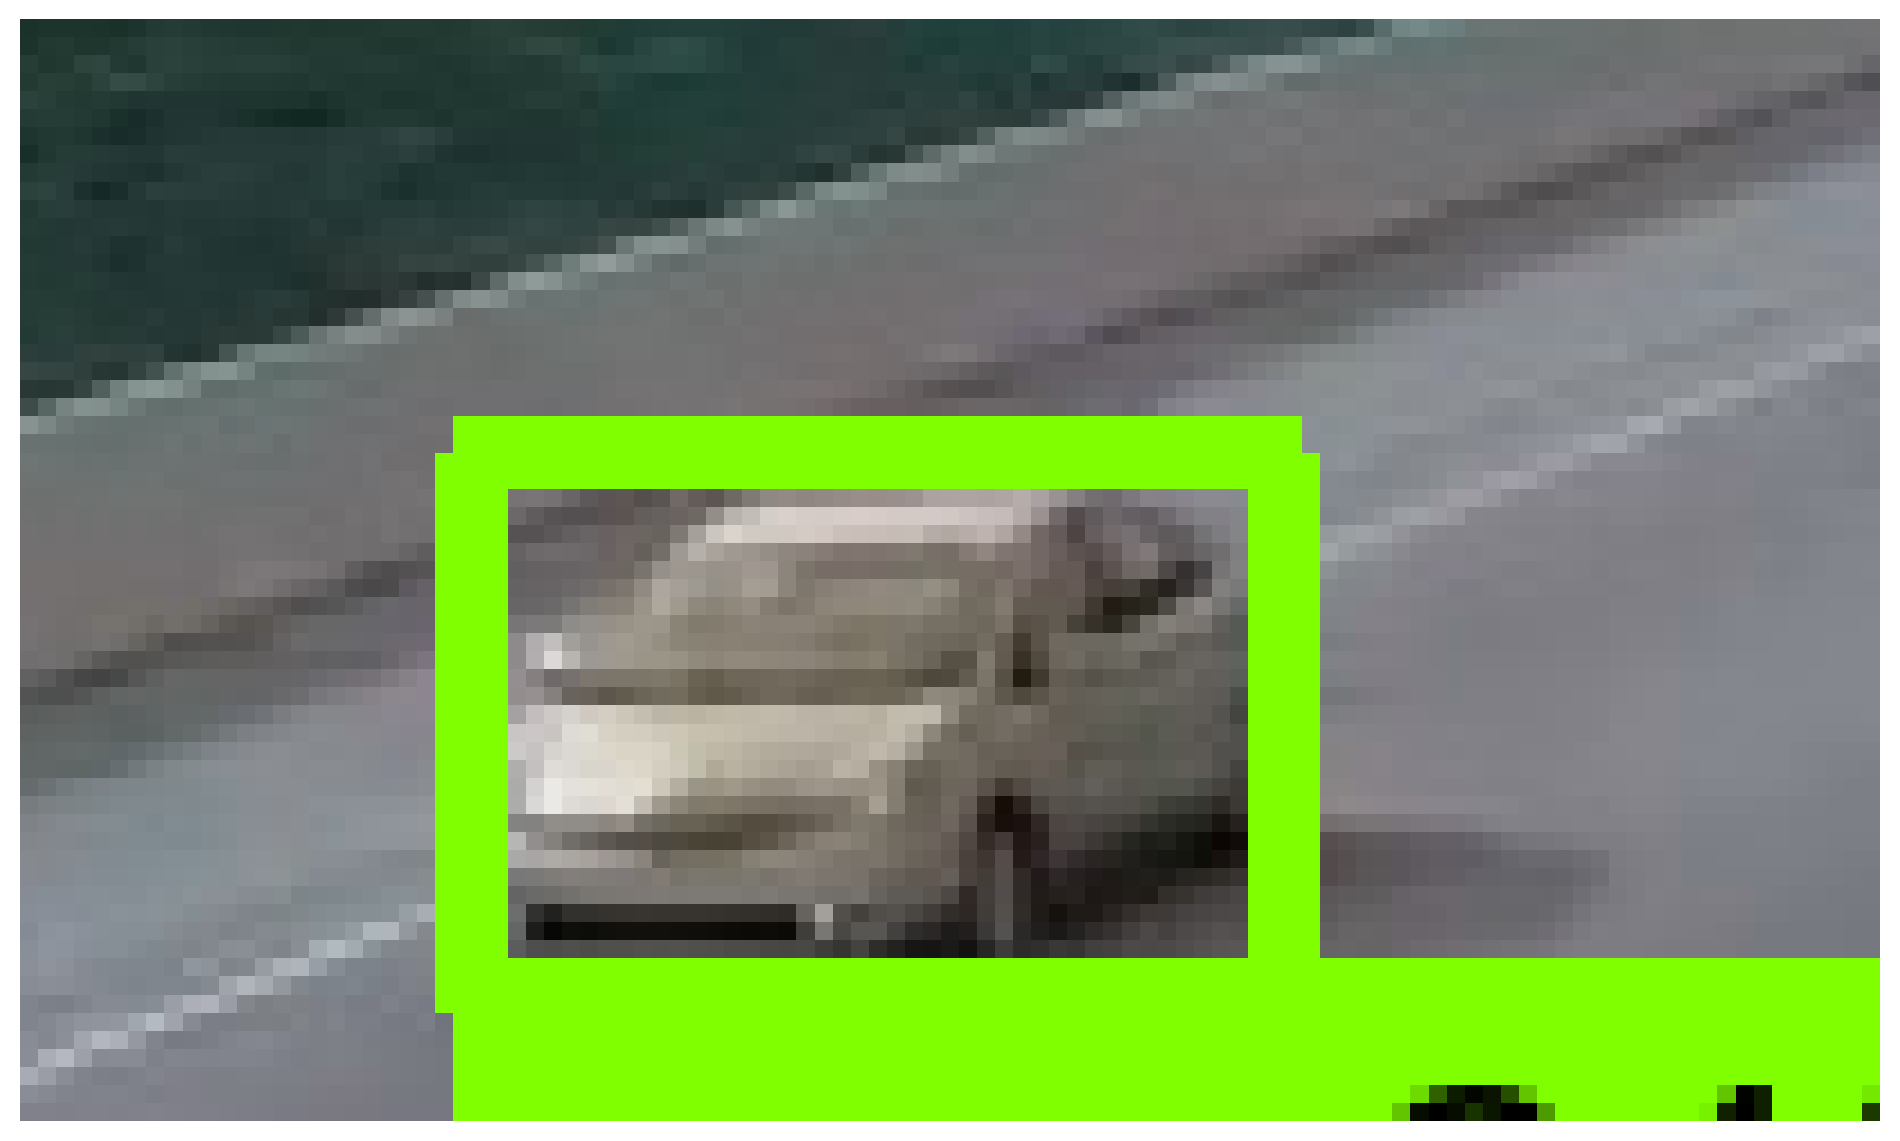

In [22]:

import cv2

def merge_boxes(box1, box2):
    # box: [ymin, xmin, ymax, xmax]
    ymin = min(box1[0], box2[0])
    xmin = min(box1[1], box2[1])
    ymax = max(box1[2], box2[2])
    xmax = max(box1[3], box2[3])
    return [ymin, xmin, ymax, xmax]
    
def detect_objects_inside_image(image_np):
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]
    
    detections = detect_fn(input_tensor)
    
    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    
    car_indices = detections['detection_classes'] == 1
    car_boxes = detections['detection_boxes'][car_indices]
    car_scores = detections['detection_scores'][car_indices]
    
    # Perform non-maximum suppression
    indices = cv2.dnn.NMSBoxes(
        np.array(car_boxes).astype(np.int32),
        np.array(car_scores),
        score_threshold=0.4,
        nms_threshold=0.5
    ).flatten()
    
    # Merge overlapping boxes and get highest score
    #merged_box, highest_score = merge_boxes(car_boxes, car_scores, indices)
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    image_np_with_detections = image_np.copy()


    for i in indices:
        print(car_boxes[i])
        print(car_scores[i])
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][indices],
        detections['detection_classes'][indices],
        detections['detection_scores'][indices],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.80, # Adjust this value to set the minimum probability boxes to be classified as True
        agnostic_mode=False)
    %matplotlib inline
    plt.figure(figsize=IMAGE_SIZE, dpi=200)
    plt.axis("off")
    plt.imshow(image_np_with_detections)
    plt.show()

# Open a video file
cap = cv2.VideoCapture("C:\\Users\\Mihai Gherghinescu\\source\\repos\\TrafficManager\\resources\\TestData\\CarTestVideo2.mp4")

# # Check if the video file was opened successfully
# if not cap.isOpened():
#     print("Error opening video file")

# DELAY = 25

# cnt = 0
# # Read frames from the video file
# while cap.isOpened():
#     # Capture frame-by-frame
#     ret, frame = cap.read()
    
#     # Check if the frame was read successfully
#     if not ret:
#         break

#     if (cnt == 0):
#         image_np = np.array(frame)
#         detect_objects_inside_image(image_np)
#     # Display the frame

#     cnt = (cnt + 1) % DELAY
#     # Wait for 25ms and check if the user pressed the 'q' key
#     if cv2.waitKey(25) & 0xFF == ord('q'):
#         break

# # Release the video capture object and close all windows
# cap.release()
# cv2.destroyAllWindows()

# def load_image_into_numpy_array(path):

#     return np.array(cv2.imread(path))

image_path = ".\\output.jpg"
detect_objects_inside_image(cv2.imread(image_path))
# #print('Running inference for {}... '.format(image_path), end='')

# image_np = load_image_into_numpy_array(image_path)


Export model for c++

In [35]:
import tensorflow as tf

from re import match

from tensorflow import keras
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

from tensorflow.python.tools import optimize_for_inference_lib

import numpy as np
#path of the directory where you want to save your model
frozen_out_path = ''
# name of the .pb file
frozen_graph_filename = 'graph_frozen_Test'

OUTPUT_DIR = ".\\models\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\exports_2023-04-21_09-40-31"
PATH_TO_SAVED_MODEL= OUTPUT_DIR + "\\saved_model"

loaded = tf.saved_model.load(PATH_TO_SAVED_MODEL)
infer = loaded.signatures['serving_default']

full_model = tf.function(infer).get_concrete_function(input_tensor=tf.TensorSpec(shape=[1, None, None, 3], dtype=tf.uint8))

# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
graph_def = frozen_func.graph.as_graph_def()


extract_names = lambda x: x.name

# fara input_control_node si output_control_node
input_layers = list(filter(lambda v: match('.*input.*', v.name) and 'input_control_node' not in v.name, graph_def.node))

output_layers = list(filter(lambda v: match('.*output.*', v.name) and 'output_control_node' not in v.name, graph_def.node))

input_layer_names = list(map(extract_names, input_layers))
output_layer_names = list(map(extract_names, output_layers))

print("Input layers: ")
print([n for n in input_layer_names])
print("Output layers: ")
print([n for n in output_layer_names])

graph_def = optimize_for_inference_lib.optimize_for_inference(graph_def,
                                                              input_layer_names,
                                                              output_layer_names,
                                                              tf.float32.as_datatype_enum)
                                                              
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)
# Save frozen graph to disk

for node in graph_def.node:
    node.ClearField('experimental_type')
    
tf.io.write_graph(graph_or_graph_def=graph_def,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pb",
                  as_text=False)
# Save its text representation
tf.io.write_graph(graph_or_graph_def=graph_def,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pbtxt",
                  as_text=True)

Input layers: 
['input_tensor', 'Func/StatefulPartitionedCall/input/_1', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/input/_411', 'unused_control_flow_input', 'unused_control_flow_input_1', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/body/_821/input/_869', 'unused_control_flow_input_2', 'unused_control_flow_input_3', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/body/_821/input/_867', 'unused_control_flow_input_4', 'unused_control_flow_input_5', 'unused_control_flow_input_6', 'unused_control_flow_input_7', 'unused_control_flow_input_8', 'unused_control_flow_input_9', 'unused_control_flow_input_10', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/body/_821/input/_865', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/body/_821/input/_864', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/cond/_820/input/_856', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/cond/_820/input/_857'

'graph_frozen_Test.pbtxt'

In [28]:
import tensorflow as tf

OUTPUT_DIR = ".\\models\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\exports_2023-04-21_09-40-31"
PATH_TO_SAVED_MODEL= OUTPUT_DIR + "\\saved_model"


# load the saved model
model = tf.saved_model.load(PATH_TO_SAVED_MODEL)

# Get the model's concrete function
concrete_func = model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]

# Get the graph definition from the concrete function's graph
graph_def = concrete_func.graph.as_graph_def()


# save the graph definition
tf.io.write_graph(graph_def, '.', 'my_graph_def.pb', as_text=False)

'.\\my_graph_def.pb'

In [32]:
import tensorflow as tf
import os
from re import match
import pyperclip
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.platform import gfile

OUTPUT_DIR = ".\\models\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\exports_2023-04-21_09-40-31"
PATH_TO_SAVED_MODEL= OUTPUT_DIR + "\\saved_model"

input_graph=PATH_TO_SAVED_MODEL + "\\saved_model.pb"

loaded = tf.saved_model.load(PATH_TO_SAVED_MODEL)
# checkpoint = tf.train.Checkpoint(model=loaded)

# checkpoint.save(input_checkpoint)

infer = loaded.signatures['serving_default']


output_names = [node.op.name for node in infer.outputs]

print("Output nodes:")
print(output_names)


command_name = os.path.abspath(".\\tenserflow_env_py3.9\\Lib\\site-packages\\tensorflow\\python\\tools\\freeze_graph.py")
input_checkpoint= os.path.abspath(OUTPUT_DIR + "\\checkpoint\\ckpt-0")
output_node_names = ",".join(output_names)
output_graph = "frozen_graph_rezult.pb"
input_saved_model_dir = PATH_TO_SAVED_MODEL

# output_node_names = "StatefulPartitionedCall,NoOp,Const_30,saver_filename,StatefulPartitionedCall_1,StatefulPartitionedCall_2"
# input_graph = 'frozen_graph.pb'
command = "python \"{}\" --input_graph=\"{}\" --input_binary=True --input_checkpoint=\"{}\" --output_graph=\"{}\" --output_node_names=\"{}\" --input_saved_model_dir=\"{}\"".format(command_name, input_graph, input_checkpoint, output_graph, output_node_names, input_saved_model_dir)

print(command)

pyperclip.copy(command)

Output nodes:
['Identity', 'Identity_1', 'Identity_2', 'Identity_3', 'Identity_4', 'Identity_5', 'Identity_6', 'Identity_7']
python "c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\tenserflow_env_py3.9\Lib\site-packages\tensorflow\python\tools\freeze_graph.py" --input_graph=".\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\exports_2023-04-21_09-40-31\saved_model\saved_model.pb" --input_binary=True --input_checkpoint="c:\Users\Mihai Gherghinescu\source\repos\TrafficManager\MLDataTraining\Python\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\exports_2023-04-21_09-40-31\checkpoint\ckpt-0" --output_graph="frozen_graph_rezult.pb" --output_node_names="Identity,Identity_1,Identity_2,Identity_3,Identity_4,Identity_5,Identity_6,Identity_7" --input_saved_model_dir=".\models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\exports_2023-04-21_09-40-31\saved_model"


In [51]:
import tensorflow as tf

from re import match
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

from tensorflow.python.tools import freeze_graph

from tensorflow.python.tools import optimize_for_inference_lib

OUTPUT_DIR = ".\\models\\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\\exports_2023-04-21_09-40-31"
PATH_TO_SAVED_MODEL= OUTPUT_DIR + "\\saved_model"

loaded = tf.saved_model.load(PATH_TO_SAVED_MODEL)
infer = loaded.signatures['serving_default']

f = tf.function(infer).get_concrete_function(input_tensor=tf.TensorSpec(shape=[1, None, None, 3], dtype=tf.uint8))
f2 = convert_variables_to_constants_v2(f)
graph_def = f2.graph.as_graph_def()


#regex with input and output keyword
#print([n.name for n in graph_def.node])

extract_names = lambda x: x.name

# fara input_control_node si output_control_node
input_layers = list(filter(lambda v: match('.*input.*', v.name) and 'input_control_node' not in v.name, graph_def.node))

output_layers = list(filter(lambda v: match('.*output.*', v.name) and 'output_control_node' not in v.name, graph_def.node))

input_layer_names = list(map(extract_names, input_layers))
output_layer_names = list(map(extract_names, output_layers))

print("Input layers: ")
print([n for n in input_layer_names])
print("Output layers: ")
print([n for n in output_layer_names])

# # Remove NoOp nodes
# for i in reversed(range(len(graph_def.node))):
#     if graph_def.node[i].op == 'NoOp':
#         del graph_def.node[i]

# for node in graph_def.node:
#     for i in reversed(range(len(node.input))):
#         if node.input[i][0] == '^':
#             del node.input[i]


# #change the nodes in here 
# # Remove a lot of Identity nodes
graph_def = optimize_for_inference_lib.optimize_for_inference(graph_def,
                                                              input_layer_names,
                                                              output_layer_names,
                                                              tf.float32.as_datatype_enum)
                                                           
# Export frozen graph
with tf.io.gfile.GFile('frozen_graph.pb', 'wb') as f:
   f.write(graph_def.SerializeToString())

Input layers: 
['input_tensor', 'unused_control_flow_input', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/body/_821/input/_868', 'unused_control_flow_input_1', 'unused_control_flow_input_2', 'unused_control_flow_input_3', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/body/_821/input/_864', 'unused_control_flow_input_4', 'unused_control_flow_input_5', 'unused_control_flow_input_6', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/body/_821/input/_865', 'unused_control_flow_input_7', 'unused_control_flow_input_8', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/body/_821/input/_866', 'Func/StatefulPartitionedCall/input/_1', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/input/_411', 'unused_control_flow_input_9', 'unused_control_flow_input_10', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/body/_821/input/_869', 'Func/StatefulPartitionedCall/StatefulPartitionedCall/map/while/cond/_820/input/_856'

In [47]:
import tensorflow as tf

with tf.io.gfile.GFile('frozen_graph.pb', "rb") as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.compat.v1.Session() as sess:
    # Restore the graph
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

     # Open a file for writing
    with open('debug_output.txt', 'w') as file:
        # Write the names of all the operations in the graph to the file
        for op in tf.compat.v1.get_default_graph().get_operations():
            file.write(op.name + '\n')

In [30]:
import cv2

# Load the TensorFlow model
model = cv2.dnn.readNetFromTensorflow('frozen_graph_rezult.pb')

image = cv2.imread(".\\test.jpg")
# Set the input layer of the model
model.setInput(cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True))

# Perform forward pass on the model
output = model.forward()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\net.cpp:79: error: (-215:Assertion failed) !empty() in function 'cv::dnn::dnn4_v20221220::Net::forward'
